In [15]:
import pandas as pd

enrollment = pd.read_csv('../data/enrollment.csv')
students = pd.read_csv('../data/student0214.csv')

students.head()

,id,sex,entrance_year,grad_class,final_major,final_major_main,final_major_sub,code-semester
0,602,M,2003,2007,Mechanical Engineering,Mechanical Engineering,NaN,"['AHS1101 0304FA', 'FND1210 0304FA', 'FND1312 ..."
1,537,F,2002,0,Engineering,Engineering,NaN,"['FND1210 0203FA', 'FND1310 0203FA', 'FND1311 ..."
2,856,M,2003,2007,Engineering Systems,Engineering,Systems,"['FND1210 0304FA', 'FND1312 0304FA', 'FND1410 ..."
3,535,F,2004,2008,Engineering Computing,Engineering,Computing,"['ENGR1110 0405FA', 'ENGR1200 0405FA', 'MTH111..."
4,483,M,2004,2008,Engineering Systems,Engineering,Systems,"['ENGR1110 0405FA', 'ENGR1200 0405FA', 'MTH111..."


In [84]:
def course_part_of_major(course, major):
    major_counts = get_major_counts(major)
    course_major_counts = get_course_major_count(course, major)
    
    above = course_major_counts <= major_counts
    pvalue = sum(above) / float(len(major_counts))
    return pvalue
    
def get_course_major_count(course, major):
    course_student_ids = get_course_student_ids(course)
    majors = students[students.id.isin(course_student_ids)].final_major_main
    major_count = sum(majors == major)
    return major_count
        
def get_major_counts(major):
    courses = enrollment.columns[1:]
    major_counts = []
    for course in courses:
        major_count = get_course_major_count(course, major)
        major_counts.append(major_count)
    return major_counts
        
def get_course_student_ids(course):
    return enrollment[enrollment.loc[:, course] == True].index.tolist()

In [85]:
course_part_of_major('Dynamics', 'Mechanical Engineering')

[4, 10, 6, 5, 4, 7, 16, 4, 4, 5, 0, 7, 5, 29, 3, 33, 3, 4, 4, 34, 11, 6, 3, 10, 12, 4, 24, 3, 4, 4, 7, 3, 5, 9, 1, 2, 3, 5, 2, 2, 3, 3, 5, 3, 4, 5, 0, 125, 39, 42, 2, 4, 37, 24, 25, 2, 0, 2, 4, 3, 2, 1, 0, 2, 2, 5, 2, 2, 4, 9, 1, 3, 3, 1, 4, 7, 6, 1, 0, 2, 6, 4, 4, 2, 3, 4, 6, 3, 4, 3, 2, 3, 1, 1, 2, 2, 2, 1, 0, 1, 2, 3, 3, 4, 6, 52, 3, 5, 2, 1, 8, 1, 0, 18, 7, 3, 11, 2, 1, 0, 2, 18, 55, 55, 31, 31, 2, 34, 4, 26, 5, 1, 0, 9, 2, 5, 2, 2, 1, 3, 5, 1, 1, 6, 7, 56, 50, 3, 18, 64, 30, 75, 18, 63, 31, 71, 32, 4, 1, 2, 1, 2, 0, 0, 219, 14, 24, 3, 2, 3, 3, 2, 11, 2, 2, 1, 202, 127, 100, 0, 53, 36, 68, 64, 79, 45, 21, 19, 147, 6, 0, 7, 3, 2, 1, 0, 4, 11, 1, 3, 0, 3, 3, 0, 3, 0, 0, 1, 49, 7, 53, 17, 4, 4, 8, 49, 1, 16, 12, 0, 1, 3, 3, 3, 3, 2, 6, 2, 53, 18, 64, 0, 0, 4, 5, 23, 26, 11, 3, 4, 4, 0, 0, 0, 5, 4, 2, 0, 2, 1, 89, 4, 61, 2, 12, 5, 8, 2, 1, 7, 1, 2, 4, 3, 5, 4, 9, 0, 6, 3, 2, 0, 1, 0, 0, 56, 3, 54, 1, 5, 19, 5, 15, 2, 7, 1, 3, 7, 6, 24, 9, 8, 0, 0, 3, 10, 9, 3, 0, 4, 1, 7, 40, 17, 3, 25

0.046153846153846156

In [86]:
course_part_of_major('Technology in American History', 'Mechanical Engineering')

[4, 10, 6, 5, 4, 7, 16, 4, 4, 5, 0, 7, 5, 29, 3, 33, 3, 4, 4, 34, 11, 6, 3, 10, 12, 4, 24, 3, 4, 4, 7, 3, 5, 9, 1, 2, 3, 5, 2, 2, 3, 3, 5, 3, 4, 5, 0, 125, 39, 42, 2, 4, 37, 24, 25, 2, 0, 2, 4, 3, 2, 1, 0, 2, 2, 5, 2, 2, 4, 9, 1, 3, 3, 1, 4, 7, 6, 1, 0, 2, 6, 4, 4, 2, 3, 4, 6, 3, 4, 3, 2, 3, 1, 1, 2, 2, 2, 1, 0, 1, 2, 3, 3, 4, 6, 52, 3, 5, 2, 1, 8, 1, 0, 18, 7, 3, 11, 2, 1, 0, 2, 18, 55, 55, 31, 31, 2, 34, 4, 26, 5, 1, 0, 9, 2, 5, 2, 2, 1, 3, 5, 1, 1, 6, 7, 56, 50, 3, 18, 64, 30, 75, 18, 63, 31, 71, 32, 4, 1, 2, 1, 2, 0, 0, 219, 14, 24, 3, 2, 3, 3, 2, 11, 2, 2, 1, 202, 127, 100, 0, 53, 36, 68, 64, 79, 45, 21, 19, 147, 6, 0, 7, 3, 2, 1, 0, 4, 11, 1, 3, 0, 3, 3, 0, 3, 0, 0, 1, 49, 7, 53, 17, 4, 4, 8, 49, 1, 16, 12, 0, 1, 3, 3, 3, 3, 2, 6, 2, 53, 18, 64, 0, 0, 4, 5, 23, 26, 11, 3, 4, 4, 0, 0, 0, 5, 4, 2, 0, 2, 1, 89, 4, 61, 2, 12, 5, 8, 2, 1, 7, 1, 2, 4, 3, 5, 4, 9, 0, 6, 3, 2, 0, 1, 0, 0, 56, 3, 54, 1, 5, 19, 5, 15, 2, 7, 1, 3, 7, 6, 24, 9, 8, 0, 0, 3, 10, 9, 3, 0, 4, 1, 7, 40, 17, 3, 25

0.56153846153846154

In [103]:
import random

courses = enrollment.columns[1:]
some_courses = random.sample(courses, 5)
some_courses += ['Signals and Systems']

pvalues = [course_part_of_major(course, "Electr'l & Computer Engr") for course in some_courses]
print pvalues

[2, 8, 8, 5, 4, 7, 18, 5, 4, 6, 1, 3, 4, 22, 2, 49, 3, 2, 4, 35, 11, 6, 10, 14, 5, 3, 18, 5, 1, 0, 10, 2, 6, 2, 3, 7, 4, 0, 4, 1, 2, 2, 6, 3, 6, 10, 1, 127, 43, 50, 4, 1, 48, 21, 21, 4, 3, 1, 3, 0, 2, 2, 5, 0, 2, 4, 3, 2, 2, 12, 2, 3, 1, 6, 5, 8, 6, 5, 3, 1, 8, 3, 1, 4, 3, 1, 2, 2, 1, 5, 3, 3, 2, 1, 1, 4, 5, 2, 1, 2, 4, 2, 4, 5, 6, 41, 4, 2, 3, 2, 6, 4, 1, 23, 10, 0, 9, 0, 2, 2, 2, 17, 63, 63, 23, 23, 0, 44, 7, 31, 0, 0, 0, 9, 0, 7, 3, 2, 2, 0, 5, 2, 0, 3, 2, 72, 57, 2, 14, 58, 41, 73, 14, 58, 41, 72, 46, 1, 0, 1, 0, 1, 4, 3, 233, 18, 29, 6, 4, 0, 4, 0, 8, 2, 6, 0, 209, 119, 111, 1, 76, 32, 94, 80, 83, 48, 17, 21, 154, 9, 0, 10, 4, 2, 4, 1, 4, 3, 3, 9, 0, 7, 0, 0, 5, 0, 3, 1, 50, 4, 41, 11, 5, 3, 5, 54, 2, 16, 11, 3, 1, 2, 1, 6, 7, 2, 12, 2, 77, 20, 84, 0, 3, 7, 8, 40, 33, 18, 10, 8, 3, 1, 1, 0, 4, 2, 1, 5, 2, 1, 84, 12, 49, 1, 15, 8, 3, 3, 1, 7, 0, 3, 2, 1, 4, 0, 6, 1, 3, 7, 4, 2, 0, 2, 1, 27, 2, 34, 2, 6, 16, 7, 9, 4, 1, 2, 2, 5, 2, 21, 11, 6, 3, 2, 2, 7, 5, 2, 1, 2, 3, 3, 47, 17, 4,

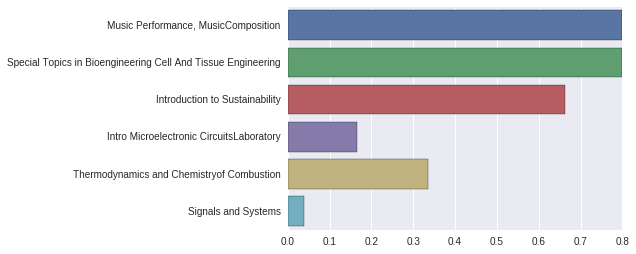

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

sns.barplot(pvalues, some_courses)
plt.show()